In [1]:
from tensorflow import keras
from keras.datasets import imdb

In [2]:
# 가장 자주 나타나는 단어 300개만 사용
(train_data, train_target), (test_data, test_target) = imdb.load_data(num_words=300)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
print(train_data.shape, train_target.shape)  # (25000,) (25000,)
print(test_data.shape, test_target.shape)  # (25000,) (25000,)

(25000,) (25000,)
(25000,) (25000,)


In [4]:
print(train_data[:3])  # list([1, ..]), list([1, ..]), list([1, ..])

[list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 2, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 

In [5]:
print(train_target[:20])  # 0(부정), 1(긍정)  # [1 0 0 1 0 0 1 0 1 .. ]

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [6]:
from sklearn.model_selection import train_test_split
train_data, val_data, train_target, val_target = train_test_split(train_data, train_target,
                                                                  test_size=0.2, random_state=0)

In [7]:
# 단어 개수 구하기
import numpy as np
word_count = np.array([len(x) for x in train_data])
word_count

array([464,  42, 372, ..., 108, 302, 188])

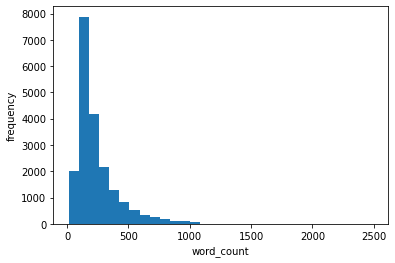

In [8]:
# 단어 개수 시각화하기
import matplotlib.pyplot as plt
plt.hist(word_count, bins=30)
plt.xlabel('word_count')
plt.ylabel('frequency')
plt.show()

In [9]:
# 리뷰 길이를 100으로 맞추기
# 100보다 큰 경우 앞부분을 자르고, 100보다 작은 경우 앞부분에 0을 넣음
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_data, maxlen=100)
print(train_seq.shape)  # (20000, 100)

(20000, 100)


In [10]:
val_seq = pad_sequences(val_data, maxlen=100)
print(val_seq.shape)  # (5000, 100)

(5000, 100)


In [11]:
# 데이터 원-핫 인코딩하기
train_oh = keras.utils.to_categorical(train_seq)  # 단어 300개 중 하나만 1이고 나머지는 0
val_oh = keras.utils.to_categorical(val_seq)
print(train_oh.shape, val_oh.shape)  # (20000, 100, 300),(5000, 100, 300)

(20000, 100, 300) (5000, 100, 300)


In [12]:
from keras import models, layers

model = models.Sequential()
model.add(layers.SimpleRNN(8,                        # 은닉상태 크기
                           input_shape=(100, 300)))  # (타임 스텝 크기, 입력 데이터 크기)
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()  # 파라미터 수 확인하기

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 2472      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 2,481
Trainable params: 2,481
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
625/625 [==============================] - 12s 17ms/step - loss: 0.6642 - accuracy: 0.5812 - val_loss: 0.6191 - val_accuracy: 0.6660
Epoch 2/100
625/625 [==============================] - 11s 18ms/step - loss: 0.5808 - accuracy: 0.7018 - val_loss: 0.5597 - val_accuracy: 0.7186
Epoch 3/100
625/625 [==============================] - 9s 14ms/step - loss: 0.5493 - accuracy: 0.7284 - val_loss: 0.5403 - val_accuracy: 0.7348
Epoch 4/100
625/625 [==============================] - 8s 13ms/step - loss: 0.5286 - accuracy: 0.7415 - val_loss: 0.5638 - val_accuracy: 0.7332
Epoch 5/100
625/625 [==============================] - 10s 16ms/step - loss: 0.5222 - accuracy: 0.7480 - val_loss: 0.5385 - val_accuracy: 0.7284
Epoch 6/100
625/625 [==============================] - 9s 15ms/step - loss: 0.5095 - accuracy: 0.7568 - val_loss: 0.5330 - val_accuracy: 0.7370
Epoch 7/100
625/625 [==============================] - 12s 19ms/step - loss: 0.5021 - accuracy: 0.7632 - val_loss: 0.5263 - val_accur

In [16]:
test_seq = pad_sequences(test_data, maxlen=100)
print(test_seq.shape)  # (25000, 100)

(25000, 100)


In [17]:
# 테스트 데이터 원-핫 인코딩하기
test_oh = keras.utils.to_categorical(test_seq)
print(test_oh.shape)  # (25000, 100, 300)

(25000, 100, 300)


In [18]:
model.evaluate(test_oh[:100], test_target[:100])

4/4 [==============================] - 0s 5ms/step - loss: 0.4786 - accuracy: 0.7600


[0.4785539507865906, 0.7599999904632568]

### 2) 단어 임베딩 방법

In [19]:
model2 = models.Sequential()
model2.add(layers.Embedding(300,                # 입력 데이터 크기
                            8,                  # 결과로 나올 임베딩 벡터 크기
                            input_length=100))  # 타임 스텝 크기
model2.add(layers.SimpleRNN(8))                 # 은닉상태 크기
model2.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 8)            2400      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 136       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,545
Trainable params: 2,545
Non-trainable params: 0
_________________________________________________________________


In [21]:
model2.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn2.h5', save_best_only=True)

history = model2.fit(train_seq, train_target, epochs=100,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
625/625 [==============================] - 13s 20ms/step - loss: 0.6744 - accuracy: 0.5812 - val_loss: 0.6196 - val_accuracy: 0.6784
Epoch 2/100
625/625 [==============================] - 7s 11ms/step - loss: 0.6465 - accuracy: 0.6328 - val_loss: 0.7154 - val_accuracy: 0.5910
Epoch 3/100
625/625 [==============================] - 6s 10ms/step - loss: 0.6134 - accuracy: 0.6734 - val_loss: 0.6060 - val_accuracy: 0.6818
Epoch 4/100
625/625 [==============================] - 6s 9ms/step - loss: 0.5890 - accuracy: 0.7005 - val_loss: 0.7001 - val_accuracy: 0.5538
Epoch 5/100
625/625 [==============================] - 5s 9ms/step - loss: 0.5963 - accuracy: 0.6817 - val_loss: 0.5740 - val_accuracy: 0.7144
Epoch 6/100
625/625 [==============================] - 5s 9ms/step - loss: 0.5492 - accuracy: 0.7307 - val_loss: 0.5754 - val_accuracy: 0.7064
Epoch 7/100
625/625 [==============================] - 5s 9ms/step - loss: 0.5335 - accuracy: 0.7444 - val_loss: 0.5712 - val_accuracy: 0.

In [22]:
model2.evaluate(test_seq[:100], test_target[:100])

4/4 [==============================] - 0s 4ms/step - loss: 0.5458 - accuracy: 0.7800


[0.5457736253738403, 0.7799999713897705]